## CIFO Baseline Analysis_1

Let's try to make use of the logger.

Idea -> Load Data into Frame and compute statistics and graphs

In [74]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [75]:
headers = ["iteration", "elite.fitness", "elite.validation_fitness", "population_size", "selection_method", "crossover_method", "crossover_rate",
                             "mutation_method", "None", "None", "mutation_rate", "phenotypic_diversity_shift"]

In [89]:
#loading CSV of CIFO data
baseline_analysis_1 = pd.read_csv("baseline_analysis_1.csv",
                             sep= ",",
                             header = None,
                             names = headers)

baseline_analysis_2 = pd.read_csv("baseline_analysis_2.csv",
                             sep= ",",
                             header = None,
                             names = headers)

pressure_1 = pd.read_csv("pressure_radius_1.csv",
                             sep= ";",
                             header = 0)

pressure_2 = pd.read_csv("pressure_radius_2.csv",
                             sep= ";",
                             header = 0)

In [90]:
baseline_analysis_1 = baseline_analysis_1.reset_index(drop=True)
pressure_1 = pressure_1.reset_index(drop=True)
baseline_analysis_1 = baseline_analysis_1.join(pressure_1)
baseline_analysis_1 = baseline_analysis_1.drop(["None", "None.1"], axis=1)
baseline_analysis_1 = baseline_analysis_1.loc[baseline_analysis_1["selection_method"]=="tournament_selection",:]

In [92]:
baseline_analysis_2 = baseline_analysis_2.reset_index(drop=True)
pressure_2 = pressure_2.reset_index(drop=True)
baseline_analysis_2 = baseline_analysis_2.join(pressure_1)
baseline_analysis_2 = baseline_analysis_2.drop(["None", "None.1"], axis=1)

In [96]:
baseline = pd.concat([baseline_analysis_1,baseline_analysis_2], ignore_index=True)

In [100]:
baseline.describe()

iteration  elite.fitness  elite.validation_fitness  population_size  \
count  16200.000000   16200.000000              16200.000000          16200.0   
mean      49.500000       0.289100                  0.285433             50.0   
std       28.866961       0.064933                  0.069991              0.0   
min        0.000000       0.158004                  0.116183             50.0   
25%       24.750000       0.241164                  0.228216             50.0   
50%       49.500000       0.282744                  0.282158             50.0   
75%       74.250000       0.332640                  0.336100             50.0   
max       99.000000       0.524948                  0.543568             50.0   

       crossover_rate  mutation_rate  phenotypic_diversity_shift  \
count    16200.000000   16200.000000                16200.000000   
mean         0.500000       0.500000                    0.000214   
std          0.326609       0.326609                    0.012640   
min          0.100000       0.100000                   -0.096350   
25%          0.100000       0.100000                   -0.005933   
50%          0.500000       0.500000                    0.000089   
75%          0.900000       0.900000                    0.006220   
max          0.900000       0.900000                    0.098419   

             Radius      Pressure  
count  16200.000000  16200.000000  
mean       0.600000      0.433333  
std        0.377135      0.305514  
min        0.200000      0.100000  
25%        0.200000      0.100000  
50%        0.600000      0.500000  
75%        1.000000      0.500000  
max        1.000000      0.900000

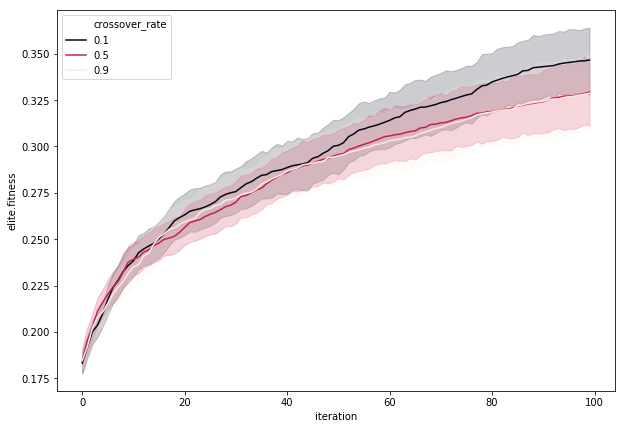

In [117]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="crossover_rate",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

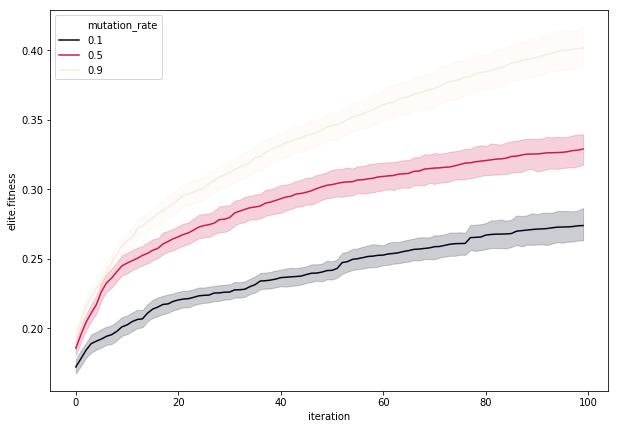

In [116]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="mutation_rate",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

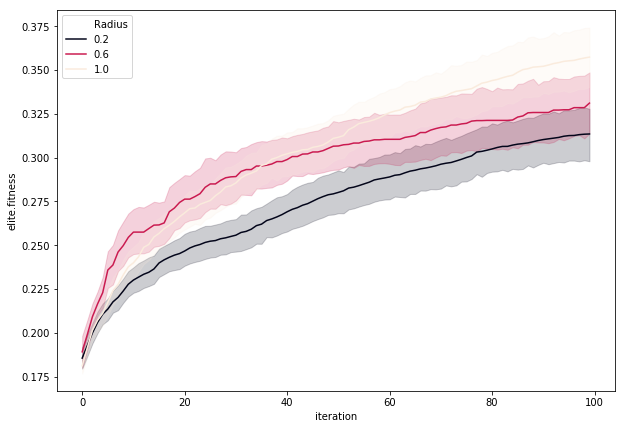

In [114]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="Radius",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

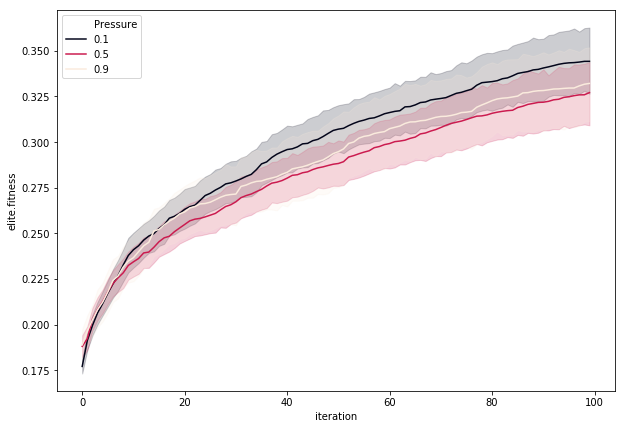

In [115]:
plt.subplots(figsize=(10,7))
sns.lineplot(x="iteration",
             y="elite.fitness",
             hue="Pressure",
             data=baseline,
            palette= "rocket",
            err_style="band",
            legend="full")

In [119]:
baseline_sorted = baseline.sort_values(by="elite.fitness")

In [121]:
baseline_sorted.tail()

iteration  elite.fitness  elite.validation_fitness  population_size  \
8996         96       0.524948                  0.543568               50   
8997         97       0.524948                  0.543568               50   
8998         98       0.524948                  0.543568               50   
8985         85       0.524948                  0.543568               50   
8993         93       0.524948                  0.543568               50   

          selection_method     crossover_method  crossover_rate  \
8996  tournament_selection  one_point_crossover             0.9   
8997  tournament_selection  one_point_crossover             0.9   
8998  tournament_selection  one_point_crossover             0.9   
8985  tournament_selection  one_point_crossover             0.9   
8993  tournament_selection  one_point_crossover             0.9   

     mutation_method  mutation_rate  phenotypic_diversity_shift  Radius  \
8996   ball_mutation            0.9                    0.002297     1.0   
8997   ball_mutation            0.9                   -0.016781     1.0   
8998   ball_mutation            0.9                   -0.006062     1.0   
8985   ball_mutation            0.9                    0.008553     1.0   
8993   ball_mutation            0.9                   -0.016560     1.0   

      Pressure  
8996       0.5  
8997       0.5  
8998       0.5  
8985       0.5  
8993       0.5